# forming X DataSet

In [1]:
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
#stopwords
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list having tuple in which first element is name of document and second is the text in documents.
#Y is the category/class

X  =[] 
Y = []
path= "C:\\Users\\JOSHITA\\Desktop\\20_newsgroups"
for category in os.listdir(path):
    for document in os.listdir(path + "\\" + category):
        with open(path + "\\" + category+ '\\'+ document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))

print(X[0])  # one element of X

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [5]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [6]:
print(len(x_train))
print(len(x_test))

14997
5000


In [30]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        if s.isalpha() and s not in stop_word and len(s)>2:
            dic[s]= dic.get(s, 0) + 1

dic

{'newsgroups': 15322,
 'rec': 4856,
 'sport': 1806,
 'baseball': 1383,
 'path': 15300,
 'cantaloupe': 19490,
 'srv': 24210,
 'cmu': 39276,
 'edu': 123250,
 'crabapple': 4663,
 'ece': 4043,
 'europa': 4065,
 'eng': 5181,
 'gtefsd': 4055,
 'com': 37696,
 'howland': 8251,
 'reston': 8249,
 'ans': 8342,
 'net': 19129,
 'noc': 4634,
 'near': 5144,
 'uunet': 4009,
 'decwrl': 498,
 'netcomsv': 156,
 'orchard': 7,
 'locus': 66,
 'prodnet': 6,
 'spica': 2,
 'aardvark': 24,
 'warren': 136,
 'usui': 6,
 'subject': 16206,
 'quick': 307,
 'way': 4010,
 'tell': 1688,
 'local': 1080,
 'beat': 245,
 'writer': 115,
 'dumb': 90,
 'message': 16445,
 'sender': 8274,
 'news': 25684,
 'netnews': 907,
 'organization': 14873,
 'computing': 563,
 'corporation': 619,
 'los': 332,
 'angeles': 298,
 'california': 791,
 'references': 9751,
 'apr': 15328,
 'pilot': 93,
 'njin': 34,
 'date': 15580,
 'tue': 1812,
 'gmt': 13324,
 'lines': 15684,
 'article': 10059,
 'gajarsky': 21,
 'bob': 755,
 'hobokenite': 9,
 'writ

In [33]:
#Sorting the dictionary on basis of frequency of words in descending order
features = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
features

[('edu', 123250),
 ('cmu', 39276),
 ('com', 37696),
 ('news', 25684),
 ('not', 25043),
 ('srv', 24210),
 ('cantaloupe', 19490),
 ('net', 19129),
 ('message', 16445),
 ('subject', 16206),
 ('lines', 15684),
 ('date', 15580),
 ('apr', 15328),
 ('newsgroups', 15322),
 ('path', 15300),
 ('can', 15156),
 ('organization', 14873),
 ('state', 14110),
 ('gmt', 13324),
 ('ohio', 11943),
 ('one', 11914),
 ('will', 11634),
 ('writes', 11018),
 ('article', 10059),
 ('references', 9751),
 ('comp', 9727),
 ('talk', 9218),
 ('misc', 8906),
 ('ans', 8342),
 ('sender', 8274),
 ('howland', 8251),
 ('reston', 8249),
 ('don', 7929),
 ('people', 7880),
 ('like', 7828),
 ('university', 7574),
 ('just', 7493),
 ('posting', 7339),
 ('nntp', 7015),
 ('mps', 6924),
 ('know', 6734),
 ('host', 6688),
 ('get', 6557),
 ('sci', 6511),
 ('usenet', 6300),
 ('zaphod', 6246),
 ('think', 6187),
 ('may', 6085),
 ('politics', 5908),
 ('alt', 5890),
 ('also', 5678),
 ('windows', 5593),
 ('time', 5389),
 ('use', 5285),
 ('rut

In [32]:
import matplotlib.pyplot as plt

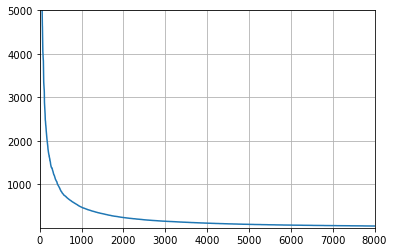

In [34]:
#Plotting graph of no. of words vs frequency 
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [35]:
#taking top 2000 words with max freuqency as our feature
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'references',
 'comp',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'people',
 'like',
 'university',
 'just',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'get',
 'sci',
 'usenet',
 'zaphod',
 'think',
 'may',
 'politics',
 'alt',
 'also',
 'windows',
 'time',
 'use',
 'rutgers',
 'harvard',
 'eng',
 'near',
 'new',
 'rec',
 'good',
 'system',
 'sei',
 'crabapple',
 'soc',
 'noc',
 'well',
 'das',
 'xref',
 'now',
 'even',
 'cis',
 'see',
 'europa',
 'religion',
 'gtefsd',
 'ece',
 'way',
 'uunet',
 'world',
 'two',
 'god',
 'first',
 'org',
 'make',
 'say',
 'many',
 'much',
 'christian',
 'gov',
 'right',
 'rochester',
 'distribution',
 'club',
 'mail',
 'andrew',
 'space',
 'want',
 'gatech',
 'anyone',
 'magnesium',
 '

In [36]:
#Making x_train dataset
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #adding frequency corresponding to that word only which is in answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [37]:
#Making x_test dataset
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #adding frequency corresponding to that word only which is in answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [38]:
print(x_train_dataset)

[[ 3  3  7 ...  0  0  0]
 [13  2  1 ...  0  0  0]
 [ 2  1  5 ...  0  0  0]
 ...
 [ 5  2  7 ...  0  0  0]
 [10  3  0 ...  0  0  0]
 [ 9  3  2 ...  0  0  0]]


In [39]:
print(x_test_dataset)

[[13  4  2 ...  0  0  0]
 [ 9  4  0 ...  0  0  0]
 [16  4  9 ...  0  0  0]
 ...
 [ 9  1  0 ...  0  0  0]
 [ 7  4  3 ...  0  0  0]
 [ 5  1  2 ...  0  0  0]]


# Inbuilt Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [55]:
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)

#print score on train and test datasets
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print("-----------------------------------------------------------------------")
#printing confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("-----------------------------------------------------------------------")
print("report:")
print(classification_report(y_test,y_pred))


Score on training data: 0.8914449556577982
Score on testing data: 0.8602
-----------------------------------------------------------------------
Confusion Matrix:
[[198   0   0   0   0   0   3   4   2   0   0   0   1   0   0   0   0   1
    0  36]
 [  0 163  17  24  16  13   7   4   1   1   0   0   2   1   1   0   0   0
    0   0]
 [  0   2 206  16   2  10   5   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   3   2 201  33   1   2   0   0   0   0   1   1   0   0   0   0   0
    0   0]
 [  0   0   0  18 243   0   7   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  12  31  11   5 176   3   0   0   0   0   0   2   0   2   0   0   0
    0   0]
 [  0   1   0   6   0   0 254   5   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   0   0   2   2   1   6 214   3   1   0   0   4   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   1   1   8 237   1   0   0   0   1   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   2   5 235  10   0   0   0   0   0   0   

# Self Implementation of Naive Bayes

In [20]:
#Making fit function 
def fit(x_train_dataset,y_train):
    count={}   #Making dictionary 
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [21]:
#probablity function
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        if xj==0:
            current_prob=0
        else:
            #with Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [43]:
#Best_class will be returned 
def predict_best_class(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)     
        if first_run or prob>best_prob:     #selecting best class
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [45]:
#predict func
def predict(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_best_class(x,dic))
    return y_pred

In [24]:
#score func
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [46]:
dictionary=fit(x_train_dataset,y_train)    #calling fit func
y_pred=predict(x_test_dataset,dictionary)  #calling predict func

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [54]:
print("Score on testing_data:",score(y_test,y_pred))
print("-----------------------------------------------------------------------")
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("-----------------------------------------------------------------------")
print("Report: ")
print(classification_report(y_test,y_pred))


Score on testing_data: 0.8768
-----------------------------------------------------------------------
Confusion Matrix:
[[215   1   1   0   0   0   1   1   1   0   0   0   0   1   0   0   0   1
    1  22]
 [  0 169  16  18  15  14   5   0   0   1   0   0   7   4   1   0   0   0
    0   0]
 [  0  10 194  21   2  13   1   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   2   2 215  21   1   2   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   0   2  15 246   0   5   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   8  29  10   4 187   2   0   0   0   0   1   1   0   0   0   0   0
    0   0]
 [  0   1   0   5   5   0 248   6   0   0   0   0   5   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   5 218   1   0   0   0   5   1   0   0   2   0
    0   0]
 [  0   1   0   0   0   0   1   5 243   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   1 241  10   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 

# Comparision



In [51]:
print("USING IN-BUILT NAIVE BAYES")
print("Score on testing data:",clf.score(x_test_dataset,y_test))

USING IN-BUILT NAIVE BAYES
Score on testing data: 0.8602


In [52]:
print("USING SELF IMPLEMENTED NAIVE BAYES")
print("Score on testing_data:",score(y_test,y_pred))

USING SELF IMPLEMENTED NAIVE BAYES
Score on testing_data: 0.8768


#### score we got from self implementation is more than the score we got from inbuilt naive bayes